Course: Application of Accelerators WT 21/22  
Date: 17.12.2021   
Name, Matriculation Number: Ines Maltusch, 314539     

<br /> 

### **Exercise 3** 

**Task 11**

Write a python function with the name of "get\_rigidity" to calculate the magnetic rigidity and put your code as usual on your GitHUB and provide the link here. Test your code with the results of the previous exercise!

In [13]:
'''
The function 'get_rigidity' calculates the magnetic rigidity with the following input parameters:

Acceleration energy, given in any multiple of the unit eV with si-prefixes or as the normalized energy unit in AMeV or MeV/u. 
Unit, given as a string with the corresponding si-prefix.
Atomic mass, given in u.
Charge state given with an int-number.


Ines Maltusch
2021-12-17

'''

import numpy as np

ec = 1.60217662*10**(-19)               # [C]
electr_mass = 9.10938356*10**(-31)      # [kg]
atomic_unit = 1.660539066*10**(-27)     # [kg]  
light_speed = 299792458                 # [m/s]

si_prefix = {'Y':10**24, 'Z':10**21, 'E':10**18, 'P':10**15, 'T':10**12, 'G':10**9, 'M':10**6, 'K':10**3,
             'm':10**-3, 'mü':10**-6, 'n':10**24, 'p':10**-12, 'f':10**-15}


def get_rigidity(acc_energy, unit, atom_mass, charge):
    for greek_symb in unit:                                                # conversion of energy unit
        if 'AMeV' == unit:
            kin_energy = acc_energy*round(atom_mass)*si_prefix['M']*ec     # [J]
        elif 'MeV/u' == unit:
            kin_energy = acc_energy*atom_mass*si_prefix ['M']*ec           # [J]
        elif greek_symb in si_prefix:
            kin_energy = acc_energy*si_prefix[greek_symb]*ec               # [J]
   
    E_0 = ((atom_mass*atomic_unit) - (charge * electr_mass))*light_speed**2     # rest mass [J]
    E_tot = kin_energy + E_0                                                    # total mass [J]
    rigidity = np.array(round((np.sqrt((E_tot**2-E_0**2))/light_speed)/(charge*ec), 2))   # [Tm]  
    return rigidity


# Calculation of tasks 3a)-6a)
particle = np.vectorize(get_rigidity, otypes=[np.float64])
particle([90, 330, 7, 10], ['AMeV', 'MeV/u', 'TeV', 'GeV'], [238.0507826, 196.966552, 1.007276467, 0.000548579909], [28, 77, 1, 1])


array([1.189000e+01, 7.260000e+00, 2.335261e+04, 3.336000e+01])

**Task 12**

From the accelerator department, you received some data (see the attached data file: 2016-07-11\_ipm\_data.txt) from an ionisation beam profile monitor (IPM). Read the file and plot it in blue color on a black grid background. The mark the maximum with a red dot! Code and plot (PNG) as usual on GitHUB.}

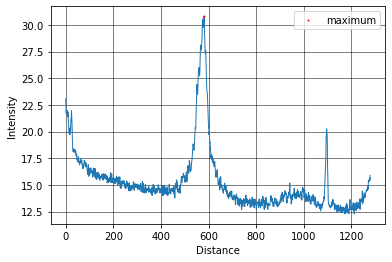

In [58]:
import numpy as np
import matplotlib.pyplot as plt

filename = '2016-07-11_ipm_data.txt'
data = np.genfromtxt(filename)


plt.plot(data, linewidth=1, markersize=1)
plt.plot((np.where(data == np.amax(data))[0]), np.amax(data), 'ro', markersize=1, label ='maximum')
plt.grid(color='k', linewidth=0.5)
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Distance')
plt.savefig('ipm_plot', dpi=200)